# Classification Models

**Classification Alogirthims**
- Decision Tree
- Naive Bayes
- Random Forest Algorithim
- Convolutional Neural Network

### Import Preliminaries

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from keras import models
from keras import layers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

### Import Data

In [6]:
# Import Data
df = pd.read_csv('Data/pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
# Cleaning Data
print(f"DataFrame Shape: {df.shape[0],df.shape[1]}")
cdf = df[df['Legendary'] == False]
cdf[['Type 1', 'Type 2']] = cdf[['Type 1', 'Type 2']].fillna(value='')
cdf['Type'] = cdf.loc[:,'Type 1'] + " " + cdf.loc[:,'Type 2']
cdf = cdf.drop(['Legendary','Name','#','Type 1','Type 2'], axis=1)
cdf['Type'] =  cdf['Type'].astype('category').cat.codes
#cdf['Type 2'] =  cdf['Type 2'].astype('category').cat.codes
print(f"DataFrame Shape: {cdf.shape[0],cdf.shape[1]}")

DataFrame Shape: (800, 13)
DataFrame Shape: (735, 9)


In [8]:
train_y = cdf.Type.values
train_x = cdf.drop(['Type'], axis=1).values

### Decision Tree

Folds: 10, accuracy: 0.0584 std: 0.03


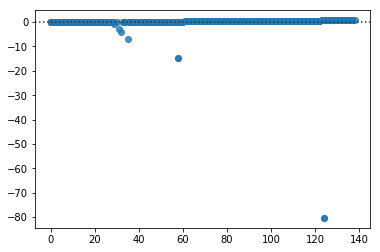

In [9]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

crossvalidation = KFold(n_splits=10, random_state=1)
scores = cross_val_score(model, train_x, train_y, scoring ='accuracy', 
                         cv=crossvalidation, n_jobs =1)

print('Folds: %i, accuracy: %.4f std: %.2f' % 
      (len(scores), np.mean(np.abs(scores)), np.std(scores)))

sns.residplot(train_y,y_pred)

### Naive Bayes

In [10]:
model = GaussianNB()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

crossvalidation = KFold(n_splits=10, random_state=1)
scores = cross_val_score(model, train_x, train_y, scoring ='accuracy', 
                         cv=crossvalidation, n_jobs =1)

print('Folds: %i, accuracy: %.8f std: %.2f' % 
      (len(scores), np.mean(np.abs(scores)), np.std(scores)))

Folds: 10, accuracy: 0.04616809 std: 0.03


### Random Forest

In [11]:
model = RandomForestClassifier()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

crossvalidation = KFold(n_splits=10, random_state=1)
scores = cross_val_score(model, train_x, train_y, scoring ='accuracy', 
                         cv=crossvalidation, n_jobs =1)

print('Folds: %i, accuracy: %.4f std: %.2f' % 
      (len(scores), np.mean(np.abs(scores)), np.std(scores)))

Folds: 10, accuracy: 0.0694 std: 0.03


### XGBoost Classifier

In [12]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X=train_x, y=train_y)
y_pred = model.predict(train_x)

crossvalidation = KFold(n_splits=10, random_state=1)
scores = cross_val_score(model, train_x, train_y, scoring ='accuracy', 
                         cv=crossvalidation, n_jobs =1)

print('Folds: %i, accuracy: %.4f std: %.2f' % 
      (len(scores), np.mean(np.abs(scores)), np.std(scores)))

Folds: 10, accuracy: 0.0951 std: 0.03


### CNN Classifier

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
  
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, labels] = 1
    return results

In [14]:
from keras.utils.np_utils import to_categorical
train_y = to_categorical(train_y)

print(f'Training Data Shape: {train_x.shape[0],train_x.shape[1]}')
print(f'Training Data Shape: {train_y.shape[0],train_y.shape[1]}')

Training Data Shape: (735, 8)
Training Data Shape: (735, 139)


In [15]:
def create_network():
  
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu',input_shape=(train_x.shape[1],)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(train_y.shape[1], activation='softmax'))

  model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
               metrics=['accuracy'])

  return model

skmodel = KerasClassifier(build_fn=create_network, 
                                 epochs=3, 
                                 batch_size=100, 
                                 verbose=0)

# Evaluate neural network using three-fold cross-validation
scores = cross_val_score(skmodel, train_x, train_y, cv=10, n_jobs=1)
print('Folds: %i, accuracy: %.4f std: %.2f' % 
      (len(scores), np.mean(np.abs(scores)), np.std(scores)))

Folds: 10, accuracy: 0.0123 std: 0.01


In [16]:
### RNN 

Author: Kavi Sekhon